In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [2]:
df = pd.read_csv("BNB-USD.csv")

In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [4]:
df_Close = df[['Close']]
df_Close = df_Close.reset_index(drop=True)

In [5]:
# Chuẩn hóa dữ liệu
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(np.array(df_Close).reshape(-1, 1))

In [6]:
# Chia dữ liệu thành tập train và test dataset
train_size = int(0.9 * len(data_scaled))
train_data, test_data = data_scaled[:train_size], data_scaled[train_size:]


In [7]:
pip install blosc2~=2.0.0

In [8]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.0 MB/s eta 0:00:00


In [9]:
# Chuyển đổi định dạng dữ liệu cho auto_arima
y_train = train_data.flatten()

In [10]:
# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-8658.090, Time=9.58 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-8608.247, Time=0.51 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-8640.112, Time=0.72 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-8635.179, Time=1.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-8610.082, Time=0.24 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-8652.223, Time=4.08 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-8641.792, Time=4.45 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-8656.130, Time=5.11 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-8651.094, Time=3.33 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-8642.815, Time=0.80 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-8648.683, Time=1.32 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-8649.189, Time=0.48 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-8669.120, Time=7.06 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=-8675.014, Time=5.37 sec
 ARIMA(4,1,2)(0,0,0

In [11]:
# Fit the model
model.fit(y_train)

ARIMA(order=(4, 1, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [12]:
# Dự đoán trên tập test
y_test = test_data.flatten()
y_pred = model.predict(n_periods=len(y_test))

In [13]:
# Chuyển đổi dữ liệu dự đoán và dữ liệu thực tế về tỷ lệ gốc
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inverse = scaler.inverse_transform(y_pred.reshape(-1, 1))

In [14]:
# Tính toán các độ đo sai lệch
test_mape = mean_absolute_percentage_error(y_test_inverse, y_pred_inverse)
test_mse = mean_squared_error(y_test_inverse, y_pred_inverse)
test_rmse = np.sqrt(test_mse)

print(f"MAPE on Test dataset: {test_mape}")
print(f"RMSE on Test dataset: {test_rmse}")
print(f"MSE on Test dataset: {test_mse}")

MAPE on Test dataset: 0.3872980608160783
RMSE on Test dataset: 242.45425750102712
MSE on Test dataset: 58784.06698037436


**Predicting the next 30,60,90 days**

In [15]:
# Dự đoán 30, 60, 90 ngày tiếp theo từ 1/6
forecast_30_days = model.predict(n_periods=30)
forecast_60_days = model.predict(n_periods=60)
forecast_90_days = model.predict(n_periods=90)

In [16]:
# Chuyển đổi dự đoán về tỷ lệ gốc
forecast_30_days_inverse = scaler.inverse_transform(forecast_30_days.reshape(-1, 1))
forecast_60_days_inverse = scaler.inverse_transform(forecast_60_days.reshape(-1, 1))
forecast_90_days_inverse = scaler.inverse_transform(forecast_90_days.reshape(-1, 1))

In [17]:
print('Predicted closing prices for the next 30 days:')
print(forecast_30_days_inverse.flatten())

print('Predicted closing prices for the next 60 days:')
print(forecast_60_days_inverse.flatten())

print('Predicted closing prices for the next 90 days:')
print(forecast_90_days_inverse.flatten())

Predicted closing prices for the next 30 days:
[232.7893911  232.68171662 232.12906736 234.80750994 231.78575998
 233.13927265 233.4371216  232.97353613 232.57764638 233.5244587
 232.9050997  232.85789961 233.16876282 233.10703085 232.85126922
 233.12224064 233.07648048 232.95215326 233.04107388 233.08669882
 232.9818437  233.02909866 233.06322742 233.01354886 233.01857443
 233.05260085 233.02456504 233.02108612 233.0415543  233.03140291]
Predicted closing prices for the next 60 days:
[232.7893911  232.68171662 232.12906736 234.80750994 231.78575998
 233.13927265 233.4371216  232.97353613 232.57764638 233.5244587
 232.9050997  232.85789961 233.16876282 233.10703085 232.85126922
 233.12224064 233.07648048 232.95215326 233.04107388 233.08669882
 232.9818437  233.02909866 233.06322742 233.01354886 233.01857443
 233.05260085 233.02456504 233.02108612 233.0415543  233.03140291
 233.02325798 233.03611946 233.03293855 233.02640243 233.03269879
 233.03322825 233.02841739 233.03129299 233.03267

In [18]:
# Tạo các chỉ số cho dữ liệu dự báo
train_dates = df.index[:train_size]
test_dates = df.index[train_size:]
# Ngày cho dự đoán
last_date = df.index[-1]
predict_dates_30 = pd.date_range(last_date + pd.Timedelta(days=1), periods=30, freq='D')
predict_dates_60 = pd.date_range(last_date + pd.Timedelta(days=1), periods=60, freq='D')
predict_dates_90 = pd.date_range(last_date + pd.Timedelta(days=1), periods=90, freq='D')

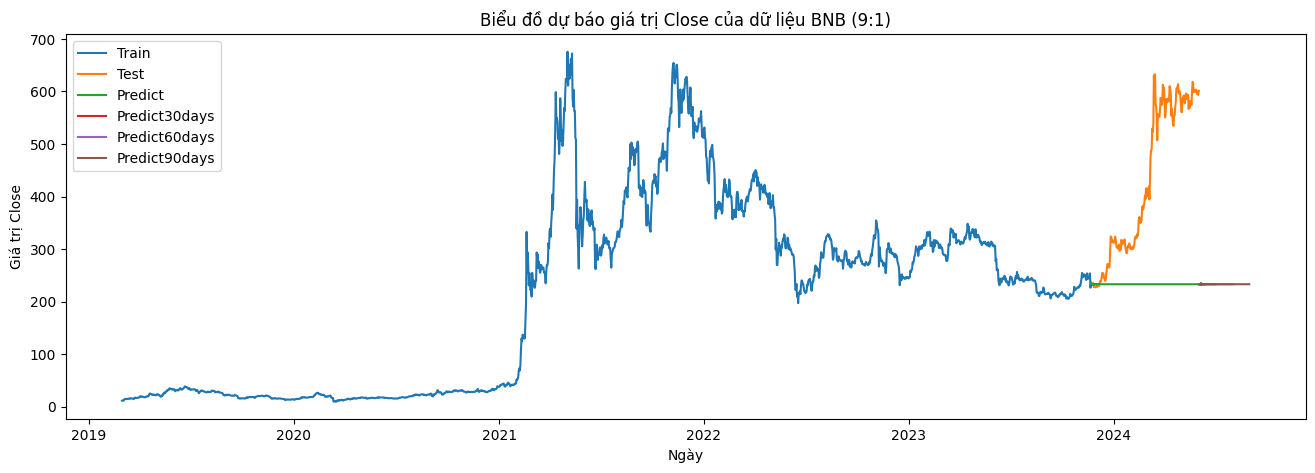

In [19]:
# Vẽ biểu đồ
plt.figure(figsize=(16, 5))

# Plotting training data
plt.plot(train_dates, scaler.inverse_transform(train_data), color='#1f77b4', linestyle='-', label='Train')

# Plotting test data
plt.plot(test_dates, y_test_inverse, color='#ff7f0e', linestyle='-', label='Test')

# Plotting predictions
plt.plot(test_dates, y_pred_inverse, color='#2ca02c', linestyle='-', label='Predict')

# Plotting 30-day forecast
plt.plot(predict_dates_30, forecast_30_days_inverse, color='#d62728', linestyle='-', label='Predict30days')

# Plotting 60-day forecast
plt.plot(predict_dates_60, forecast_60_days_inverse[:60], color='#9467bd', linestyle='-', label='Predict60days')

# Plotting 90-day forecast
plt.plot(predict_dates_90, forecast_90_days_inverse[:90], color='#8c564b', linestyle='-', label='Predict90days')

plt.legend()
plt.title("Biểu đồ dự báo giá trị Close của dữ liệu BNB (9:1)")
plt.xlabel("Ngày")
plt.ylabel("Giá trị Close")
plt.grid(False)
plt.savefig('ARIMA_BNB_91.png')
plt.show()